In [1]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


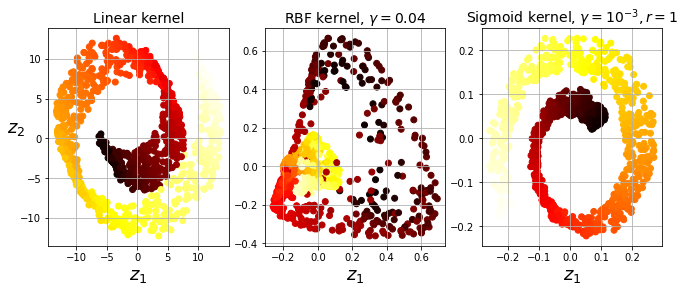

In [6]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
import numpy as np

In [18]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components = 2)), 
    ("log_reg", LogisticRegression())
])

In [23]:
param_grid = ({
    "kpca__gamma":np.linspace(0.03, 0.05, 10), 
    "kpca__kernel": ["rbf", "sigmoid"]
})

In [24]:
grid_search = GridSearchCV(clf, param_grid, cv = 3)
grid_search.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                         'kpca__kernel': ['rbf', 'sigmoid']})

In [25]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

Exercises

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=60000, test_size=10000)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rnd_clf = RandomForestClassifier(n_estimators = 100)

In [37]:
import time
t0 = time.time()
rnd_clf.fit(X_train, y_train)
print(f"training took {time.time() - t0} seconds")

training took 57.549415826797485 seconds


In [38]:
from sklearn.metrics import accuracy_score

y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9697


In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.5)

In [49]:
t0 = time.time()
X_reduced = pca.fit_transform(X_train)

In [50]:
rnd_clf2 = RandomForestClassifier(n_estimators = 100)
t0 = time.time()
rnd_clf2.fit(X_reduced, y_train)
print(f"training took {time.time() - t0} seconds")

training took 27.481077194213867 seconds


In [51]:
y_pred = rnd_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9697


In [52]:
X_train.size

47040000

In [53]:
X_reduced.size

660000